<a href="https://colab.research.google.com/github/jemma-mg/Machine-Learning/blob/main/Stock%20Price%20prediction%20using%20Facebook%20Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [ ]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [ ]:
df = pd.read_csv("TSLA.csv")

In [ ]:
#read_csv function from pandas

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,414.739109,425.323268,402.764717,415.137952,415.137952,6.178552e+07
std,234.908560,239.374833,229.101662,234.987820,234.987820,3.306128e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.515770e+07
25%,194.901001,199.384003,188.566994,193.368995,193.368995,3.628290e+07
50%,408.951996,418.700012,401.660004,408.500000,408.500000,5.561600e+07
75%,606.549988,627.795013,586.750000,607.234985,607.234985,8.131825e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df,x="Date",y='Close')

In [ ]:
px.line(df,x="Date",y="Close")

In [ ]:
px.area(df,x="Date",y="Volume")

In [ ]:
px.bar(df,y="Volume")

In [ ]:
px.box(df,y="Close")

# Understanding Facebook Prophet

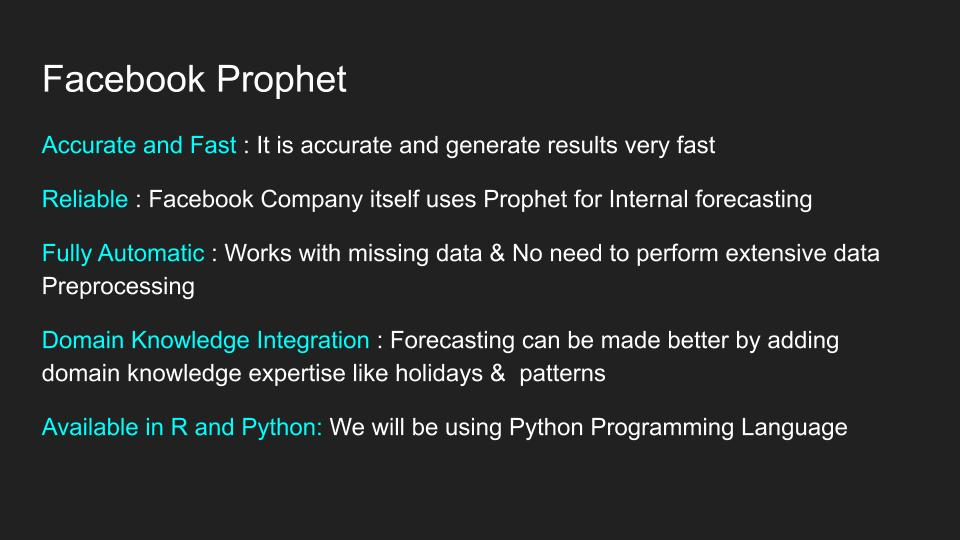

## Data Preperation

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [ ]:
columns = ["Date","Close"]
ndf = pd.DataFrame(df, columns=columns)

In [ ]:
ndf

,Date,Close
0,2020-03-16,89.014000
1,2020-03-17,86.040001
2,2020-03-18,72.244003
3,2020-03-19,85.528000
4,2020-03-20,85.505997
...,...,...
246,2021-03-08,563.000000
247,2021-03-09,673.580017
248,2021-03-10,668.059998
249,2021-03-11,699.599976


In [ ]:
prophet_df = ndf.rename(columns={"Date":"ds","Close":"y"})

In [ ]:
prophet_df

,ds,y
0,2020-03-16,89.014000
1,2020-03-17,86.040001
2,2020-03-18,72.244003
3,2020-03-19,85.528000
4,2020-03-20,85.505997
...,...,...
246,2021-03-08,563.000000
247,2021-03-09,673.580017
248,2021-03-10,668.059998
249,2021-03-11,699.599976


## Creating Facebook Prophet Model

In [ ]:
n = Prophet()
n.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [ ]:
future = n.make_future_dataframe(periods=30)
forecast = n.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-16,65.542942,-23.159953,145.749738,65.542942,65.542942,-5.872634,-5.872634,-5.872634,-5.872634,-5.872634,-5.872634,0.0,0.0,0.0,59.670308
1,2020-03-17,67.338430,-19.627734,155.863316,67.338430,67.338430,-2.416393,-2.416393,-2.416393,-2.416393,-2.416393,-2.416393,0.0,0.0,0.0,64.922037
2,2020-03-18,69.133919,-27.165591,152.219668,69.133919,69.133919,-3.506857,-3.506857,-3.506857,-3.506857,-3.506857,-3.506857,0.0,0.0,0.0,65.627062
3,2020-03-19,70.929407,-17.770467,147.484695,70.929407,70.929407,-3.854096,-3.854096,-3.854096,-3.854096,-3.854096,-3.854096,0.0,0.0,0.0,67.075311
4,2020-03-20,72.724895,-20.537569,153.133015,72.724895,72.724895,-7.755018,-7.755018,-7.755018,-7.755018,-7.755018,-7.755018,0.0,0.0,0.0,64.969877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2021-04-07,900.200625,807.622658,985.002412,898.957494,901.371980,-3.506857,-3.506857,-3.506857,-3.506857,-3.506857,-3.506857,0.0,0.0,0.0,896.693768
277,2021-04-08,902.657492,806.408962,977.696685,901.340478,903.911615,-3.854096,-3.854096,-3.854096,-3.854096,-3.854096,-3.854096,0.0,0.0,0.0,898.803395
278,2021-04-09,905.114358,816.178250,986.855217,903.729540,906.440195,-7.755018,-7.755018,-7.755018,-7.755018,-7.755018,-7.755018,0.0,0.0,0.0,897.359340
279,2021-04-10,907.571225,836.273687,1006.821977,906.112662,908.967308,11.702500,11.702500,11.702500,11.702500,11.702500,11.702500,0.0,0.0,0.0,919.273725


In [ ]:
px.line(forecast,x="ds",y="yhat")

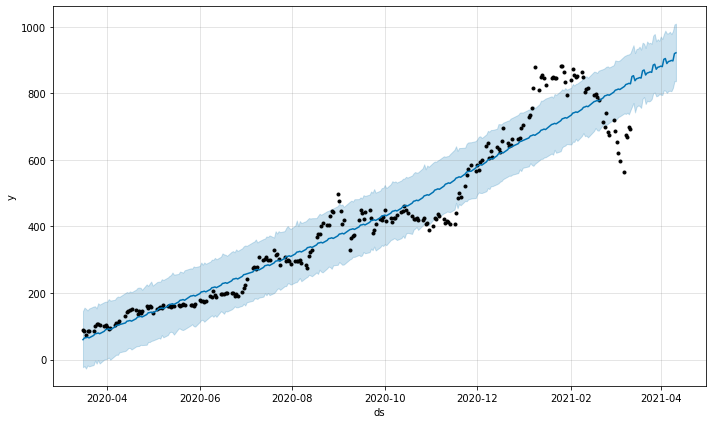

In [ ]:
figure = n.plot(forecast,xlabel="ds",ylabel="y")

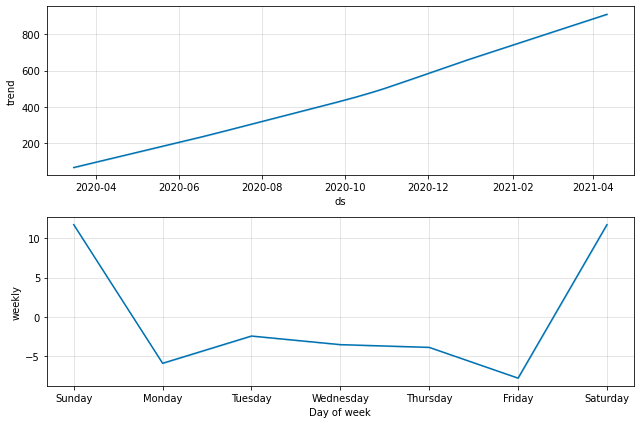

In [ ]:
figure2=n.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>